In [1]:
from molsim import MonteCarlo, blockAverage
import numpy as np
import matplotlib.pyplot as plt

<div style="max-width: 1000px; margin-left: 0; margin-right: auto; font-size: 15px; line-height: 1.6;">

# Exercise 4: Lennard-Jones Monte Carlo

## Introduction 
In this exercise, we will study a 3D Lennard-Jones NVT system. A cubic box of volume V encloses N particles at a given temperature T in any configuration allowed by the potential energy U. The potential is defined as:

\begin{equation}
U(r)
\begin{cases}
4 \varepsilon \left[ \left(\frac{\sigma}{r} \right)^{12} - \left(\frac{\sigma}{r} \right)^6 \right] & r <= r_c, \\
0 & r > r_c
\end{cases}
\end{equation}

A randomly selected particle is randomly translated to generate a new particle
configuration. If this move takes the particle outside the cube into a
surrounding or image cube, application of periodic boundary conditions means
that a new particle is inserted at the corresponding position in the original cube.
Whether the new configuration is accepted depends on the Boltzmann factor $e^{-\beta\Delta U}$,
with $\beta=1/(k_BT)$ and $\Delta U$ the energy difference between after and before the move.
The procedure to ensure that configurations that are accepted occur with a frequency
according to their Boltzmann weight involves generating a random number and a comparison
with the Boltzmann weight. If the random number is
smaller than the Boltzmann weight 
\begin{equation}
 \text{RandomNumber}<e^{-\beta \left(U^\text{new}-U^\text{old}\right)}
\end{equation}
the move is accepted, otherwise rejected, but
still counted again. Then another move is randomly chosen. Classical phase space is
directly sampled and averages of physical properties become arithmetic averages over their
sampled values. The moves is in the Monte Carlo method are artificial rather than
dynamical (in time).

The phase behavior of the Lennard-Jones system can be described in terms of its temperature vs. density phase diagram. The temperature largely determines the state of the system by scaling the importance of the entropy. At $\lim_{T \to 0}$ Kelvin, no thermal energy is available to the system, meaning that it can only be in the state of the lowest potential energy. In Monte Carlo, this can be interpreted as only moves that lower the potential energy are accepted as:

\begin{equation}
\lim_{T \to 0} \exp(-\beta (U^{new}-U^{old})) = \lim_{\beta \to \infty} \exp(-\beta (U^{new}-U^{old}))
\end{equation}

and

\begin{equation}
\lim_{\beta \to \infty} \exp(-\beta (U^{new}-U^{old})) = 
\begin{cases}
\exp(-\infty) = 0\ & U^{new}-U^{old} > 0 \\
\exp(\infty) = \infty \ & U^{new}-U^{old} < 0
\end{cases}
\end{equation}

At high temperatures, the entropy is more important than the enthalpy, meaning that more randomness is introduced. Generally, at high temperatures and low densities the system will form a gas, while at low temperatures solid structures will be found. Here, you can see the phase diagram of a Lennard-Jones system.

<figure id="fig:ljphasediagram">
  <img src="./figures/ljphasediagram.png" alt="ljphasediagram" style="width:80%;">
  <figcaption>Phase diagram of the Lennard-Jones substance. Correlations and numeric values for the critical point and triple point(s) are taken from Mokshin et. al., arXiv:2211.10559v1, 2022. The star indicates the critical point. The circle indicates the vapor–liquid–solid triple point and the triangle indicates the vapor–solid (fcc)–solid (hcp) triple point. The solid lines indicate coexistence lines of two phases.The dashed lines indicate the vapor–liquid spinodal. </figcaption>
</figure>



## Question 1
Now it is up to you to run a simulation. Underneath you will find a cell with code and various settings. Try familiarizing yourself with the various input parameters of the simulation. If we set a certain temperature and density (by tuning `numberOfParticles` or `boxSize`) what do we expect to happen. 

In [2]:
# Set up the Monte Carlo simulation
mc = MonteCarlo(
    numberOfParticles=100,
    temperature=1.0,
    boxSize=6.0,
    maxDisplacement=0.5,
    numberOfInitCycles=10000,
    numberOfProdCycles=10000,
    sampleFrequency=100,
    seed=12,
)

# Run the Monte Carlo simulation
mc.run()

[INFO]:  Class MC created.
[DEBUG]:  Monte Carlo program
----------------------------
Number of particles  : 100
Temperature          : 1.000000
Box length           : 6.000000
Volume               : 216.000000
Density              : 0.462963
CutOff radius        : 3.000000
CutOff energy        : -0.143583
Steps run            : 0
Max displacement     : 0.500000
Translation acc.     : 0.000000
Running energy       : 0.000000
Total energy         : 0.000000
Drift energy         : -nan
Running virial       : 0.000000
Total virial         : 0.000000
Drift virial         : -nan


[DEBUG]:  numGrids 5 gridSize 0.857143
[INFO]:  (Init) completed. Total energy: 3106.585740, Total virial: 55522.206471
[INFO]:  Monte Carlo program
----------------------------
Number of particles  : 100
Temperature          : 1.000000
Box length           : 6.000000
Volume               : 216.000000
Density              : 0.462963
CutOff radius        : 3.000000
CutOff energy        : -0.143583
Steps run        

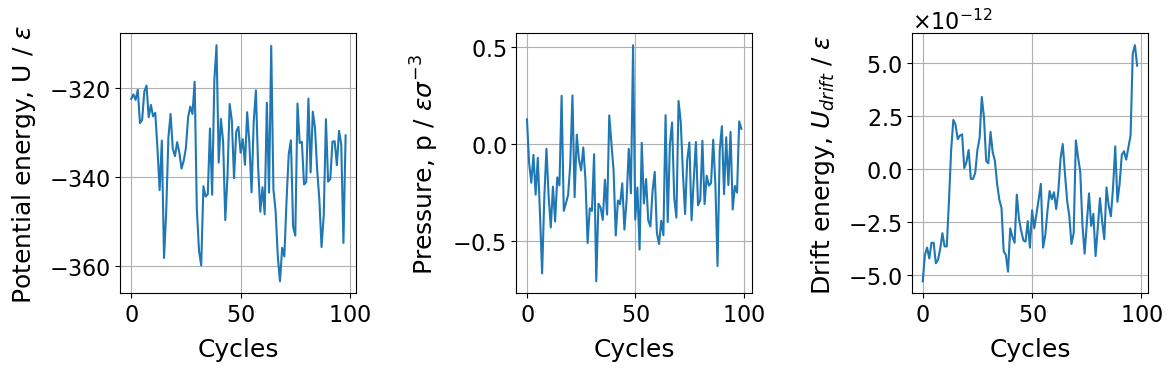

In [3]:
# Plot the results
fig, ax = plt.subplots(1, 3, figsize=(12, 4))


# start refactor
ax[0].plot(range(len(mc.energies)), mc.energies, label="Potential energy")
ax[1].plot(range(len(mc.pressures)), mc.pressures, label="Pressure")
ax[2].plot(range(len(mc.driftEnergies)), mc.driftEnergies, label="Drift")
# end refactor

ax[0].set_xlabel("Cycles")
ax[0].set_ylabel(r"Potential energy, U / $\varepsilon$")

ax[1].set_xlabel("Cycles")
ax[1].set_ylabel(r"Pressure, p / $\varepsilon \sigma^{-3}$")

ax[2].set_xlabel("Cycles")
ax[2].set_ylabel(r"Drift energy, $U_{drift}$ / $\varepsilon$")

fig.tight_layout()

<div style="max-width: 1000px; margin-left: 0; margin-right: auto; font-size: 20px; line-height: 1.6;">

Visualize the `movie.pdb` trajectory.

If the notebook NGLview-viewer does not work, visualize with your favourite visualization software (ie. ovito, vmd, ...).

In [4]:
import nglview as nv
import MDAnalysis as mda

movie = mda.Universe("movie.pdb")
view = nv.show_mdanalysis(movie)
view.add_unitcell()
view.remove_ball_and_stick()
view.camera = "orthographic"
view.add_spacefill(radius=0.4, color="pink")
view

/home/ubuntu/miniconda3/envs/CH-420/lib/python3.12/site-packages/MDAnalysis/topology/PDBParser.py:295: UserWarning: PDB file is missing resid information.  Defaulted to '1'
  warnings.warn("PDB file is missing resid information.  "
/home/ubuntu/miniconda3/envs/CH-420/lib/python3.12/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "


NGLWidget(max_frame=201)

## Question 2
We can use this system to investigate the bounds of when the ideal gas law holds. The (microscopic) ideal gas law,

\begin{equation}
pV = n k_B T
\end{equation}

or 

\begin{equation}
\beta p = \rho
\end{equation}

is valid for non-interacting particles. In the Lennard-Jones fluid we can test this by settings a sufficiently high temperature (ie. $T = 2.0$) and testing whether the ideal gas law holds. 

Run simulations at a range of densities. Up to which density does the ideal gas law hold?

**Hint**:
You can choose to manually run all pressures and read the average pressure from the output or create a loop and compute
the mean of `mc.pressures`.


## Answer
From the graphs it seems like the ideal gas law holds up to a density of about $2\times 10^{-1}$. For densities larger
than this (smaller box size) the ideal gas law does not hold.

In [5]:
# Initialize MC
temperature = 2.0

densities = []
pressures = []

for box_size in range(1, 30, 2):
    mc = MonteCarlo(
        numberOfParticles=100,
        temperature=temperature,
        boxSize=box_size,
        maxDisplacement=0.5,
        numberOfInitCycles=10000,
        numberOfProdCycles=10000,
        sampleFrequency=100,
        seed=12,
        outputPDB=False,
    )

    # Run MC
    mc.run()
    densities.append(np.mean(mc.densities))
    pressures.append(np.mean(mc.pressures))


[INFO]:  Class MC created.
[DEBUG]:  Monte Carlo program
----------------------------
Number of particles  : 100
Temperature          : 2.000000
Box length           : 1.000000
Volume               : 1.000000
Density              : 100.000000
CutOff radius        : 3.000000
CutOff energy        : -31.013888
Steps run            : 0
Max displacement     : 0.500000
Translation acc.     : 0.000000
Running energy       : 0.000000
Total energy         : 0.000000
Drift energy         : -nan
Running virial       : 0.000000
Total virial         : 0.000000
Drift virial         : -nan


[DEBUG]:  numGrids 5 gridSize 0.142857
[INFO]:  (Init) completed. Total energy: 13349593079998.525391, Total virial: 160195961341698.562500
[INFO]:  Monte Carlo program
----------------------------
Number of particles  : 100
Temperature          : 2.000000
Box length           : 1.000000
Volume               : 1.000000
Density              : 100.000000
CutOff radius        : 3.000000
CutOff energy        : -31.01

Text(0, 0.5, 'Pressure, p / $\\varepsilon \\sigma^{-3} $')

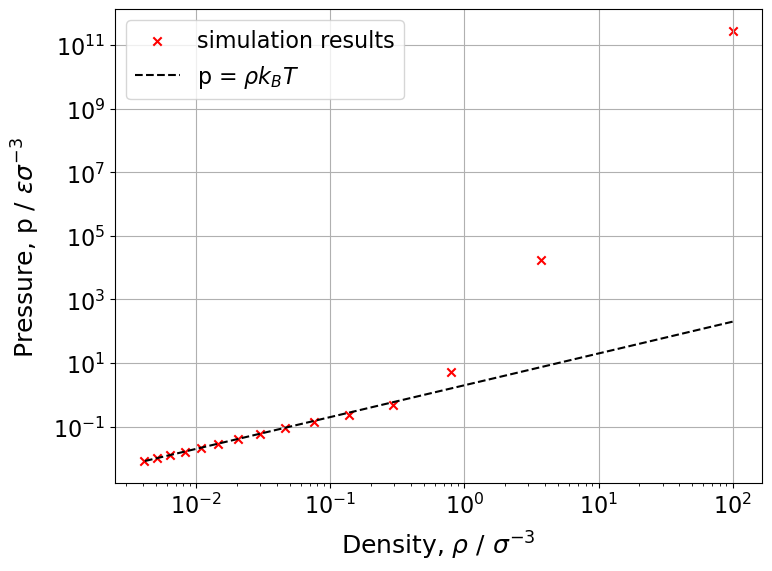

In [6]:
fig, ax = plt.subplots()

# start refactor
densities = np.array(densities)
pressures = np.array(pressures)
# end refactor

# Plot the results
if len(pressures):
    ax.scatter(densities, pressures, c="red", marker="x", label="simulation results")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.plot(densities, temperature * densities, ls="--", c="black", label=r"p = $\rho k_B T$")
    ax.legend()

ax.set_xlabel(r"Density, $\rho$ / $\sigma^{-3}$")
ax.set_ylabel(r"Pressure, p / $\varepsilon \sigma^{-3} $")

## Question 3
In this program a method is included that will optimize the maximum displacement in such a way that the acceptance rate is around 0.5. For the translation move this happens in `MonteCarlo::optimizeMaxDisplacement`, which can be found in `molsim/monteCarlo/moves.cpp`. We can skip optimizing this move by setting the `optimizeMCMoves` flag to false. This allows us to investigate the intrinsic relation between the density and the acceptance fraction of a small displacement.

Let's first set up a simulation for a range of densities. The acceptance fraction can be read from the output logs or accessed via `mc.translationAcceptance`.

In [7]:
densities = []
acceptances = []

for box_size in range(1, 30, 2):
    # Initialize MC
    mc = MonteCarlo(
        numberOfParticles=216,
        temperature=1.0,
        boxSize=box_size,
        maxDisplacement=0.1,
        numberOfInitCycles=10000,
        numberOfProdCycles=10000,
        sampleFrequency=100,
        seed=12,
        optimizeMCMoves=False,
        outputPDB=False,
        logLevel=1,
    )

    # Run MC
    mc.run()

    # Compute block averages
    densities.append(np.mean(mc.densities))
    acceptances.append(np.mean(mc.translationAcceptance))

[INFO]:  Class MC created.
[INFO]:  (Init) completed. Total energy: 152726635333460.906250, Total virial: 1832724046607386.000000
[INFO]:  Monte Carlo program
----------------------------
Number of particles  : 216
Temperature          : 1.000000
Box length           : 1.000000
Volume               : 1.000000
Density              : 216.000000
CutOff radius        : 3.000000
CutOff energy        : -66.989998
Steps run            : 0
Max displacement     : 0.100000
Translation acc.     : 0.000000
Running energy       : 152726635333460.906250
Total energy         : 152726635333460.906250
Drift energy         : 0.000000
Running virial       : 1832724046607386.000000
Total virial         : 1832724046607386.000000
Drift virial         : 0.000000


[INFO]:  Monte Carlo program
----------------------------
Number of particles  : 216
Temperature          : 1.000000
Box length           : 1.000000
Volume               : 1.000000
Density              : 216.000000
CutOff radius        : 3.000000
C

Text(0, 0.5, 'Acceptance, acc / -')

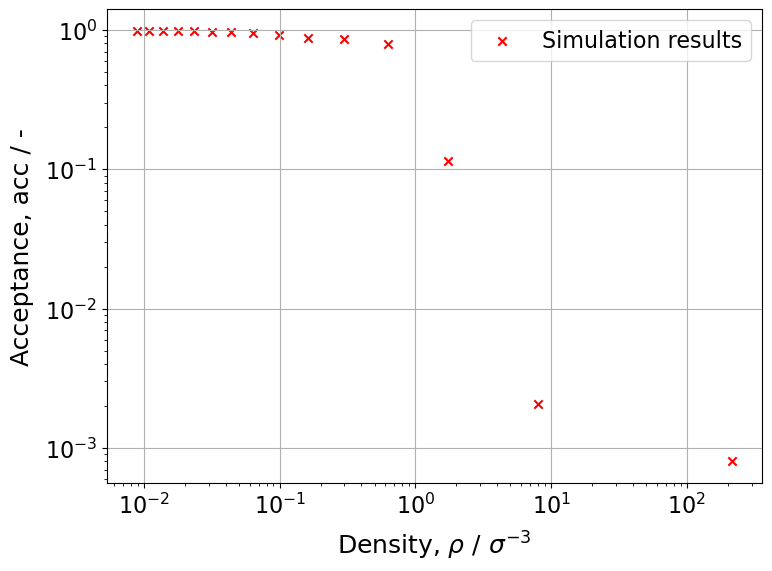

In [8]:
# Plot the results
fig, ax = plt.subplots()

# start refactor
densities = np.array(densities)
acceptance = np.array(acceptances)
# end refactor

if len(densities):
    ax.scatter(densities, acceptances, marker="x", c="red", label="Simulation results")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.legend()

ax.set_xlabel(r"Density, $\rho$ / $\sigma^{-3}$")
ax.set_ylabel(r"Acceptance, acc / -")

## Question 4
It takes twice as much heat to heat a kilogram of a material one degree Kelvin as it does to heat half a kilogram. That’s fairly intuitive. So when we talk about heat capacities, how much material are we talking about? The simplest way is to talk about the heat capacity per gram. This is known as the specific heat and is usually denoted by a small c. Done at constant volume it is $c_V$ . Specific heats are very practical since it is usually easy to weigh things. But the resulting values don’t tell us much about what is really going on. For instance, a gram of aluminium contains almost exactly 7.3 times as many atoms as a gram of gold. What would be interesting is the per atom (or more practically, the per mole) value of the heat capacity. And this molar heat capacity is usually what is given in tables. To avoid confusion the symbol for it is a capital $C$, $C_V$ . For the heat capacity at constant volume one can derive

\begin{equation}
C_{V} = \frac{1}{N} \left( \frac{\partial U}{\partial T} \right)_{V} = \frac{\langle U^2 \rangle - \langle U \rangle^2}{N k_B T^2}
\end{equation}

in which U is the total energy of the system. This is the correction to the ideal-gas heat capacity of 3/2kB, resulting
from particle-particle interactions. Derive a formula for the dimensionless heat capacity. Modify the function
underneath and compute the heat capacity of the system. Do you get an expected value? Hint: If not, try to increase the
density and think about why.


## Answer
To make the heat capacity dimensionless we usually divide by $k_B$ the Boltzmann Constant

\begin{equation}
    C_{V, dimless} = \frac{\langle U^2\rangle - \langle U \rangle^2}{Nk_B^2T^2}
\end{equation}

In [9]:
def computeHeatCapacity(potentialEnergies: np.ndarray, numberOfParticles: int, temperature: float):
    # start refactor

    numerator = np.mean(potentialEnergies**2) - np.mean(potentialEnergies) ** 2
    denominator = numberOfParticles * temperature**2
    return numerator / denominator
    # end refactor

## Question 5
In computational simulations like molecular dynamics, accurately determining quantities such as potential energy and pressure is essential. However, these measurements often exhibit statistical fluctuations due to correlated data points, making traditional variance-based error estimates unreliable. **Block averaging** is an effective technique to address this issue by providing more accurate confidence intervals for these quantities.

### Why Use Block Averaging?

Simulations generate time-series data where consecutive measurements are typically correlated. This correlation can lead to underestimated uncertainties when using standard variance. Block averaging mitigates this by dividing the data into independent blocks, allowing for a better estimation of the true statistical error.

### Block Averaging Method

Given a series of potential energy measurements:
$ E_1, E_2, \ldots, E_N $

**1. Divide into Blocks:**
Choose a block size $ B $ and divide the data into $ M = \left\lfloor \frac{N}{B} \right\rfloor $ blocks:
$ \text{Block } m: E_{(m-1)B +1} \text{ to } E_{mB} $

**2. Compute Block Averages:**
For each block $ m $:
$ \bar{E}_m = \frac{1}{B} \sum_{i=(m-1)B +1}^{mB} E_i $

**3. Overall Average:**
$ \langle E \rangle = \frac{1}{M} \sum_{m=1}^{M} \bar{E}_m $


Compute the pressure and potential energies for a simulation for a range of simulation lengths in terms of cycles. Calculate the confidence interval using the `blockAverage` function given in `molsim/utils.py` and plot the given values.

How does the error scale with simulation length? Why are the values for longer simulations outside the confidence interval for the shorter simulations?

**Note**: By settings `logLevel=1` we suppress debug message and prevent excessive printing of the status reports. For the longer simulation the program will print $10^5$ status reports, which can require large amounts of memory for VSCode or jupyter! (> 180GB)

In [10]:
# Initialize MC
lengths = np.logspace(2, 5, 9)
pressures = np.zeros((lengths.shape[0], 2))
energies = np.zeros((lengths.shape[0], 2))

# Run set of MC simulations
for i, c in enumerate(lengths):
    # Initialize MC
    mc = MonteCarlo(
        numberOfParticles=108,
        temperature=0.8,
        boxSize=6.0,
        maxDisplacement=0.5,
        numberOfInitCycles=10000,
        numberOfProdCycles=int(c),
        sampleFrequency=10,
        seed=12,
        optimizeMCMoves=False,
        logLevel=1,
        outputPDB=False,
    )
    # Run MC
    mc.run()
    # Compute block averages
    # start refactor
    
    pressure_samples = np.array(mc.pressures)
    energy_samples = np.array(mc.energies)

    # Calculate mean and error for pressures using block averaging
    if pressure_samples.size > 0:
        mean_p, error_p = blockAverage(pressure_samples)
        pressures[i, 0] = mean_p
        pressures[i, 1] = error_p
    else:
        # No samples collected for pressure
        pressures[i, 0] = np.nan
        pressures[i, 1] = np.nan

    # Calculate mean and error for energies using block averaging
    if energy_samples.size > 0:
        mean_e, error_e = blockAverage(energy_samples)
        energies[i, 0] = mean_e
        energies[i, 1] = error_e
    else:
        # No samples collected for energy
        energies[i, 0] = np.nan
        energies[i, 1] = np.nan


    # end refactor

[INFO]:  Class MC created.
[INFO]:  (Init) completed. Total energy: 3331.393876, Total virial: 59610.972910
[INFO]:  Monte Carlo program
----------------------------
Number of particles  : 108
Temperature          : 0.800000
Box length           : 6.000000
Volume               : 216.000000
Density              : 0.500000
CutOff radius        : 3.000000
CutOff energy        : -0.155069
Steps run            : 0
Max displacement     : 0.500000
Translation acc.     : 0.000000
Running energy       : 3331.393876
Total energy         : 3331.393876
Drift energy         : 0.000000
Running virial       : 59610.972910
Total virial         : 59610.972910
Drift virial         : 0.000000


[INFO]:  Monte Carlo program
----------------------------
Number of particles  : 108
Temperature          : 0.800000
Box length           : 6.000000
Volume               : 216.000000
Density              : 0.500000
CutOff radius        : 3.000000
CutOff energy        : -0.155069
Steps run            : 10100
Max di

Text(0, 0.5, 'Potential energy, U / $\\varepsilon$')

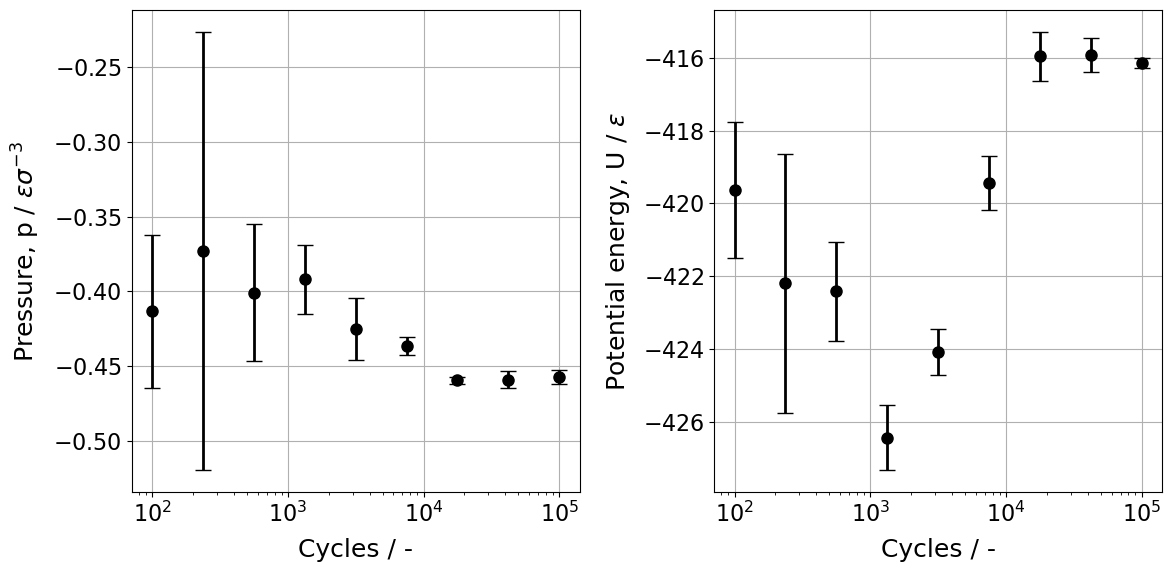

In [11]:
# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].errorbar(lengths, pressures[:, 0], yerr=pressures[:, 1], fmt="o", markersize=8, linewidth=2, capsize=6, c="black")
ax[0].set_xscale("log")
ax[0].set_xlabel("Cycles / -")
ax[0].set_ylabel(r"Pressure, p / $\varepsilon \sigma^{-3}$")


ax[1].errorbar(lengths, energies[:, 0], yerr=energies[:, 1], fmt="o", markersize=8, linewidth=2, capsize=6, c="black")
ax[1].set_xscale("log")
ax[1].set_xlabel("Cycles / -")
ax[1].set_ylabel(r"Potential energy, U / $\varepsilon$")